In [1]:
%run common_init.py

Start import
Host: DESKTOP-EC5OUSI.localdomain
calculating effective efficiency for Xe detector done
calculating effective efficiency for Ge detector done
calculating effective efficiency for Ar detector done
calculating effective efficiency for Xe_migd detector done
calculating effective efficiency for Ge_migd detector done
calculating effective efficiency for Ar_migd detector done
Done import
SYSTEM
	Running on linux
	Python version 3.7.4 (default, Aug 13 2019, 20:35:49) [GCC 7.3.0]
	Python installation /home/joran/.conda/envs/DD_DM/bin/python
MODULES
	DirectDmTargets
		ver.:	0.2.0
		Path:	/mnt/c/Users/Joran/Google Drive/PhD-master/ubuntu-storage/windows-anaconda/DD_DM_targets/DirectDmTargets/

	wimprates
		ver.:	0.3.2
		Path:	/mnt/c/Users/Joran/Google Drive/PhD-master/ubuntu-storage/windows-anaconda/forked_wimprates/wimprates/



In [2]:
!pwd

/mnt/c/Users/Joran/Google Drive/PhD-master/ubuntu-storage/windows-anaconda/DD_DM_targets/notebooks


# Direct detection of Dark matter using different target materials #

Author:

Joran Angevaare <j.angevaare@nikef.nl>

Date:

14 october 2019 

## Goal ## 

- Roughly reproduce <https://journals.aps.org/prd/abstract/10.1103/PhysRevD.83.083505>
- Update the results thereof with more recent knowledge of the DM-distribution

### Approach ###
To achieve these goals, we must first get a decent recoil spectrum, that is flexible enough to have different astrophysical parameters. Further, it must also be flexible enough to be able to allow for different analytic functions to be added to the model. For instance, we must be able to incorporate the $\rm{SHM}^{++}$ as presented here <https://arxiv.org/abs/1810.11468>.

When we have a sufficiently flexible model, we want to add in the detector physics, we should therein incorporate at least the following parameters:
- target
  - material
  - cross-section
- threshold
- background
- cut efficiency  
- volume
- exposure

Finally we should perform the inference

## HALO model ##



In [3]:
fit_class = dddm.NestleStatModel('Xe_migd')
fit_class.tol = 0.8
fit_class.verbose = 10
# fit_class.nwalkers = 5
# fit_class.nsteps = 10
fit_class.nlive = 10
fit_class.set_prior('migdal')
print(f"Fitting for parameters:\n{fit_class.fit_parameters}")

StatModel::	2020-01-14T15:51
	initialized for Xe_migd detector.See print(stat_model) for default settings
check_save_folder::	making /mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_230/vesc_544
check_save_folder::	making /mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_230/vesc_544/rho_0.400
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_230/vesc_544/rho_0.400/sig_-45.0_mx_1.70_avg.csv
Generating spectrum, this can take a minute. Execute:
python "../../verne/"/src/CalcVelDist.py -m_x 49.99999999999999 -sigma_p 1e-45 -loc XENON -path "../../verne//src/" -v_0 230.0 -v_esc 544.0 -save_as "/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_230/vesc_544/rho_0.400/sig_-45.0_mx_1.70_avg.csv" 
StatModel::	2020-01-14T15:52
	set_prior
StatModel::	2020-01-14T15:52
	reading priors
Fitting for parameters:
['log_mass', 'log_cross_section']


StatModel::	2020-01-14T15:52
	evaluating
		<class 'DirectDmTargets.detector.DetectorSpectrum'>
	for mw = 49.99999999999999, 
	sig = 1e-45, 
	halo model = 
		shielded_shm and 
	detector = 
		{'material': 'Xe', 'type': 'migdal', 'exp': 25, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 1.4, 'location': 'XENON', 'res': <function det_res_XENON1T at 0x7f7c1121d680>, 'bg_func': <function migdal_background_XENON1T at 0x7f7c1121d7a0>, 'exp_eff': 10.0, 'name': 'Xe_migd'}
StatModel::	2020-01-14T15:52
	looking for intermediate results
check_save_folder::	making /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-50.00/log_s--45.00/rho-0.55
check_save_folder::	making /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-50.00/log_s--45.00/rho-0.55/v_0-233.0
check_save_folder::	making /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-50.00/log_s--45.00/rho-0.55/v_0-233.0/v_esc-528
check_save_folder::	making /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model

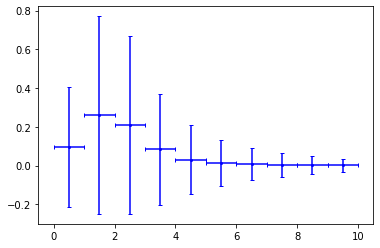

In [4]:
dddm.plot_spectrum(fit_class.check_spectrum())

In [ ]:
fit_class.run_nestle()
fit_class.get_summary()

NestleStatModel::	2020-01-14T15:53
	We made it to my core function, lets do that optimization
NestleStatModel::	2020-01-14T15:53
	here we go! We are going to fit:
	2 parameters

run_nestle::	2020-01-14T15:53
	start_fit for 2 parameters
NestleStatModel::	2020-01-14T15:53
	beyond this point, there is nothing I can say, you'll have to wait for my lower level algorithms to give you info, see you soon!
NestleStatModel::	2020-01-14T15:53
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T15:53
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T15:53
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T15:53
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T15:53
	SUPERVERBOSE	there we go! Find that log

/home/joran/.conda/envs/DD_DM/lib/python3.7/site-packages/scipy/integrate/quadpack.py:860: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)


StatModel::	2020-01-14T15:58
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-2.01/log_s--31.36/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T15:58
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T15:58
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T15:58
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T15:58
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T15:58
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T15:58
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T15:58
	SUPERVERBOSE	evaluate spectrum
StatMode



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T16:08
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.04/log_s--33.02/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T16:08
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T16:08
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T16:08
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T16:08
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T16:08
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T16:08
	SUPERVERBOSE	there we go! Find that log probability
StatModel



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T16:13
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.08/log_s--37.67/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T16:13
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T16:13
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T16:13
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T16:13
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T16:13
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T16:13
	SUPERVERBOSE	there we go! Find that log probability
StatModel



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T16:21
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.11/log_s--33.42/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T16:21
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T16:21
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T16:21
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T16:21
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T16:21
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T16:21
	SUPERVERBOSE	there we go! Find that log probability
StatModel

StatModel::	2020-01-14T16:27
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-1.83/log_s--26.33/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T16:27
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T16:27
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T16:27
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T16:27
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T16:27
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T16:27
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T16:27
	SUPERVERBOSE	evaluate spectrum
StatMode

StatModel::	2020-01-14T16:34
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-1.22/log_s--27.40/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T16:34
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T16:34
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T16:34
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T16:34
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T16:34
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T16:34
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T16:34
	SUPERVERBOSE	evaluate spectrum
StatMode

StatModel::	2020-01-14T16:39
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.07/log_s--28.96/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T16:39
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T16:39
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T16:39
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T16:39
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T16:39
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T16:39
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T16:39
	SUPERVERBOSE	evaluate spectrum
StatMode



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T16:47
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.03/log_s--37.80/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T16:47
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T16:47
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T16:47
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T16:47
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T16:47
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T16:47
	SUPERVERBOSE	there we go! Find that log probability
StatModel

StatModel::	2020-01-14T17:00
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.19/log_s--26.63/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T17:00
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T17:00
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:00
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:00
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:00
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:00
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T17:00
	SUPERVERBOSE	evaluate spectrum
StatMode



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T17:14
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.14/log_s--32.13/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T17:14
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T17:14
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:14
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:14
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:14
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:14
	SUPERVERBOSE	there we go! Find that log probability
StatModel

StatModel::	2020-01-14T17:20
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.02/log_s--30.19/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T17:20
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T17:20
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:20
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:20
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:20
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:20
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T17:20
	SUPERVERBOSE	evaluate spectrum
StatMode

StatModel::	2020-01-14T17:27
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-1.65/log_s--29.74/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T17:27
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T17:27
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:27
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:27
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:27
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:27
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T17:27
	SUPERVERBOSE	evaluate spectrum
StatMode

StatModel::	2020-01-14T17:34
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.01/log_s--33.37/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T17:34
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T17:34
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:34
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:34
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:34
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:34
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T17:34
	SUPERVERBOSE	evaluate spectrum
StatMode



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T17:42
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.38/log_s--33.26/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T17:42
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T17:42
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:42
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:42
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:42
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:42
	SUPERVERBOSE	there we go! Find that log probability
StatModel

StatModel::	2020-01-14T17:46
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.05/log_s--27.34/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T17:46
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T17:46
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:46
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:46
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:46
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:46
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T17:46
	SUPERVERBOSE	evaluate spectrum
StatMode



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T17:55
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-1.04/log_s--31.85/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T17:55
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T17:55
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:55
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:55
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:55
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:55
	SUPERVERBOSE	there we go! Find that log probability
StatModel

StatModel::	2020-01-14T17:59
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.66/log_s--28.00/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T17:59
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T17:59
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:59
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:59
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T17:59
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T17:59
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T17:59
	SUPERVERBOSE	evaluate spectrum
StatMode

StatModel::	2020-01-14T18:03
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.74/log_s--25.61/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T18:03
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T18:03
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:03
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:03
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:03
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:03
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T18:03
	SUPERVERBOSE	evaluate spectrum
StatMode

StatModel::	2020-01-14T18:07
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.91/log_s--25.67/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T18:07
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T18:07
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:07
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:07
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:07
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:07
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T18:07
	SUPERVERBOSE	evaluate spectrum
StatMode

StatModel::	2020-01-14T18:12
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.05/log_s--26.74/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T18:12
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T18:12
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:12
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:12
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:12
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:12
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T18:12
	SUPERVERBOSE	evaluate spectrum
StatMode

StatModel::	2020-01-14T18:16
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.13/log_s--26.47/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T18:16
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T18:16
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:16
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:16
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:16
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:16
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T18:16
	SUPERVERBOSE	evaluate spectrum
StatMode

StatModel::	2020-01-14T18:20
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-1.54/log_s--29.71/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T18:20
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T18:20
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:20
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:20
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:20
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:20
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T18:20
	SUPERVERBOSE	evaluate spectrum
StatMode



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T18:30
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.51/log_s--39.80/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T18:30
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T18:30
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:30
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:30
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:30
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:30
	SUPERVERBOSE	there we go! Find that log probability
StatModel

StatModel::	2020-01-14T18:36
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-4.26/log_s--34.31/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T18:36
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T18:36
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:36
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:36
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:36
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:36
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T18:36
	SUPERVERBOSE	evaluate spectrum
StatMode

StatModel::	2020-01-14T18:42
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.11/log_s--29.21/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T18:42
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T18:42
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:42
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:42
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:42
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:42
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T18:42
	SUPERVERBOSE	evaluate spectrum
StatMode

StatModel::	2020-01-14T18:49
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.33/log_s--26.60/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T18:49
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T18:49
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:49
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:49
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:49
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:49
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T18:49
	SUPERVERBOSE	evaluate spectrum
StatMode

StatModel::	2020-01-14T18:52
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.30/log_s--26.14/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T18:52
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T18:52
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:52
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:52
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T18:52
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T18:52
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T18:52
	SUPERVERBOSE	evaluate spectrum
StatMode



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T19:01
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.10/log_s--30.43/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T19:01
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T19:01
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:01
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:01
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:01
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:01
	SUPERVERBOSE	there we go! Find that log probability
StatModel



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T19:06
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-1.89/log_s--38.39/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T19:06
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T19:06
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:06
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:06
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:06
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:06
	SUPERVERBOSE	there we go! Find that log probability
StatModel

StatModel::	2020-01-14T19:11
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.06/log_s--29.65/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T19:11
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T19:11
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:11
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:11
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:11
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:11
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T19:11
	SUPERVERBOSE	evaluate spectrum
StatMode

StatModel::	2020-01-14T19:15
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.22/log_s--27.19/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T19:15
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T19:15
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:15
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:15
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:15
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:15
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T19:15
	SUPERVERBOSE	evaluate spectrum
StatMode



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T19:20
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-1.54/log_s--36.58/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T19:20
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T19:20
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:20
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:20
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:20
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:20
	SUPERVERBOSE	there we go! Find that log probability
StatModel

StatModel::	2020-01-14T19:30
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.42/log_s--27.47/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T19:30
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T19:30
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:30
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:30
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:30
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:30
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T19:30
	SUPERVERBOSE	evaluate spectrum
StatMode

StatModel::	2020-01-14T19:38
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.52/log_s--30.39/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T19:38
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T19:38
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:38
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:38
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:38
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:38
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T19:38
	SUPERVERBOSE	evaluate spectrum
StatMode

StatModel::	2020-01-14T19:45
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-1.01/log_s--28.21/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T19:45
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T19:45
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:45
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:45
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:45
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:45
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T19:45
	SUPERVERBOSE	evaluate spectrum
StatMode



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T19:55
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.04/log_s--36.70/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T19:55
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T19:55
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:55
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:55
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:55
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:55
	SUPERVERBOSE	there we go! Find that log probability
StatModel



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T19:58
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.03/log_s--39.79/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T19:58
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T19:58
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:58
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:58
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T19:58
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T19:58
	SUPERVERBOSE	there we go! Find that log probability
StatModel



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T20:07
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.55/log_s--31.23/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T20:07
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T20:07
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T20:07
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T20:07
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T20:07
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T20:07
	SUPERVERBOSE	there we go! Find that log probability
StatModel

StatModel::	2020-01-14T20:13
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-2.30/log_s--34.54/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T20:13
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T20:13
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T20:13
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T20:13
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T20:13
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T20:13
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T20:13
	SUPERVERBOSE	evaluate spectrum
StatMode

StatModel::	2020-01-14T20:17
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.01/log_s--29.19/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T20:17
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T20:17
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T20:17
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T20:17
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T20:17
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T20:17
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T20:17
	SUPERVERBOSE	evaluate spectrum
StatMode



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T20:27
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.03/log_s--33.88/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T20:27
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T20:27
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T20:27
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T20:27
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T20:27
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T20:27
	SUPERVERBOSE	there we go! Find that log probability
StatModel

StatModel::	2020-01-14T20:34
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-6.10/log_s--34.75/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T20:34
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T20:34
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T20:34
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T20:34
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T20:34
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T20:34
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T20:34
	SUPERVERBOSE	evaluate spectrum
StatMode



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T20:46
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.27/log_s--34.31/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T20:46
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T20:46
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T20:46
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T20:46
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T20:46
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T20:46
	SUPERVERBOSE	there we go! Find that log probability
StatModel

StatModel::	2020-01-14T20:55
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-2.52/log_s--33.46/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T20:55
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T20:55
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T20:55
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T20:55
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T20:55
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T20:55
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T20:55
	SUPERVERBOSE	evaluate spectrum
StatMode



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T21:03
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-1.62/log_s--32.71/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T21:03
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T21:03
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T21:03
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T21:03
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T21:03
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T21:03
	SUPERVERBOSE	there we go! Find that log probability
StatModel

StatModel::	2020-01-14T21:10
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-5.70/log_s--38.45/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T21:10
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T21:10
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T21:10
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T21:10
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T21:10
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T21:10
	SUPERVERBOSE	there we go! Find that log probability
StatModel::	2020-01-14T21:10
	SUPERVERBOSE	evaluate spectrum
StatMode



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-14T21:14
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.06/log_s--39.69/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
NestleStatModel::	2020-01-14T21:14
	SUPERVERBOSE	found it! returning the log likelihood
NestleStatModel::	2020-01-14T21:14
	SUPERVERBOSE	doing _log_prior_transform_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T21:14
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T21:14
	SUPERVERBOSE	doing some transformations for nestle to read the priors
NestleStatModel::	2020-01-14T21:14
	SUPERVERBOSE	doing _log_probability_nestle
		ooph, what a nasty function to do some transformations behind the scenes
NestleStatModel::	2020-01-14T21:14
	SUPERVERBOSE	there we go! Find that log probability
StatModel

In [ ]:
# fit_class.show_corner()
!dir ../../verne/results/veldists/f_params/loc_XENON/v0_233/vesc_528/rho_0.550/sig_-26.0_mx_-0.20_avg.csv

In [ ]:
fit_class = dddm.NestleStatModel('Xe_migd')
fit_class.tol = 0.8
# fit_class.nwalkers = 5
# fit_class.nsteps = 10
fit_class.nlive = 15
fit_class.set_prior('migdal')
print(f"Fitting for parameters:\n{fit_class.fit_parameters}")

In [ ]:
fit_class.set_benchmark(mw = 2, sigma = -41)

In [ ]:
dddm.plot_spectrum(fit_class.check_spectrum())

In [ ]:
fit_class.config

In [ ]:
fit_class.run_nestle()
fit_class.get_summary()

In [ ]:
fit_class.show_corner()


In [ ]:
# fit_class = dddm.MCMCStatModel('Xe_migd')
# # fit_class.tol = 0.8
# fit_class.nwalkers = 5
# fit_class.nsteps = 10
# # fit_class.nlive = 5
# fit_class.set_prior('migdal')
# print(f"Fitting for parameters:\n{fit_class.fit_parameters}")

In [ ]:
# fit_class.set_benchmark(mw = 1, sigma = -35)

In [ ]:
# fit_class.config

In [ ]:
# fit_class.check_spectrum()

In [ ]:
# fit_class.run_emcee()

In [ ]:
# fit_class.show_walkers()

In [ ]:
# import os

In [ ]:
# os.system("cd")

In [ ]:
# fit_class.run_nestle()
# fit_class.get_summary()

In [ ]:
# fit_class.show_corner()

In [ ]:
assert False

In [ ]:
fit_unconstrained = dddm.NestleStatModel('Xe_migd')
fit_unconstrained.tol = 0.8
fit_unconstrained.nlive = 200
fit_unconstrained.set_prior('migdal')
fit_unconstrained.set_fit_parameters(fit_unconstrained.known_parameters)
print(f"Fitting for parameters:\n{fit_unconstrained.fit_parameters}")

In [ ]:
fit_unconstrained.set_benchmark(mw = 2, sigma = -40)

In [ ]:
fit_unconstrained.run_nestle()
fit_unconstrained.get_summary()

In [ ]:
fit_unconstrained.show_corner()

In [ ]:
fit_unconstrained.get_summary()